# TfM_Explo_Desc_V1

# This notebook explores and describes the dataset -Tweets.csv-

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS  
import preprocessor as p
import emoji
from pywsd.utils import lemmatize_sentence
import shap
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Warming up PyWSD (takes ~10 secs)... took 24.084563493728638 secs.


In [2]:
# Read File --Tweets.csv.---
Tweets_df= pd.read_csv('Tweets.csv')

In [3]:
# Show the shape of the dataset
print(Tweets_df.shape)

(14640, 15)


In [4]:
# Describe Tweets Sentiments.
Tweets_df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
## Visualize the first 15 rows.
Tweets_df.head(15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [6]:
## Visualize the last 15 rows.
Tweets_df.tail(15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14625,569589643487928321,positive,1.0000,NaN,NaN,American,NaN,DrCaseyJRudkin,NaN,0,@AmericanAir Flight 236 was great. Fantastic c...,"[40.64946781, -73.76624703]",2015-02-22 12:08:48 -0800,East Coast,NaN
14626,569589460226183168,negative,1.0000,Late Flight,1.0000,American,NaN,cataattack,NaN,0,@AmericanAir Flight 953 NYC-Buenos Aires has b...,NaN,2015-02-22 12:08:04 -0800,"Buenos Aires, Argentina",Buenos Aires
14627,569588816438169600,negative,1.0000,Cancelled Flight,1.0000,American,NaN,KristinaMeyer7,NaN,0,"@AmericanAir Flight Cancelled Flightled, can't...",NaN,2015-02-22 12:05:30 -0800,NaN,Eastern Time (US & Canada)
14628,569588651925098496,positive,1.0000,NaN,NaN,American,NaN,jlhalldc,NaN,0,Thank you. “@AmericanAir: @jlhalldc Customer R...,NaN,2015-02-22 12:04:51 -0800,"Washington, DC",Eastern Time (US & Canada)
14629,569588591602458624,negative,1.0000,Customer Service Issue,1.0000,American,NaN,jontgreen89,NaN,0,@AmericanAir How do I change my flight if the ...,NaN,2015-02-22 12:04:37 -0800,"Waco, TX",Central Time (US & Canada)
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito


# Explore main features

In [7]:
## Feature: airline_sentiment. This feature shows us the main --sentiments-- register in the dataset. 
print(Tweets_df.airline_sentiment.unique())

['neutral' 'positive' 'negative']


In [8]:
## Feature: airline. This feature show us the main --airlines-- registers in the dataset. 
print(Tweets_df.airline.unique())

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [9]:
## Feature: This feature show us the main  --tweet_location-- registers in the dataset.
print(Tweets_df.user_timezone.unique())

['Eastern Time (US & Canada)' 'Pacific Time (US & Canada)'
 'Central Time (US & Canada)' 'America/New_York' 'Atlantic Time (Canada)'
 'Quito' nan 'Mountain Time (US & Canada)' 'Vienna' 'Caracas'
 'Kuala Lumpur' 'Brisbane' 'Arizona' 'London' 'Tehran' 'Alaska' 'Sydney'
 'Irkutsk' 'Santiago' 'Amsterdam' 'Tijuana' 'Abu Dhabi' 'Central America'
 'Edinburgh' 'Jerusalem' 'Hawaii' 'Paris' 'Guam' 'New Delhi' 'Stockholm'
 'America/Chicago' 'Berlin' 'Madrid' 'Athens' 'Brussels' 'Taipei' 'Rome'
 'Beijing' 'Mexico City' 'Bern' 'Singapore' 'Indiana (East)' 'Melbourne'
 'Saskatchewan' 'Casablanca' 'Brasilia' 'Kyiv' 'Bucharest' 'Greenland'
 'Prague' 'New Caledonia' 'Bogota' 'Seoul' 'Sarajevo' 'Wellington'
 'Bangkok' 'Warsaw' 'Copenhagen' 'Hong Kong' 'Guadalajara' 'Mid-Atlantic'
 'Mazatlan' 'Buenos Aires' 'America/Los_Angeles' 'Dublin' 'Lisbon'
 'Newfoundland' 'Monterrey' 'Tokyo' 'America/Detroit' 'Midway Island'
 'Istanbul' 'Solomon Is.' 'America/Atikokan' 'Adelaide' 'Nairobi' 'EST'
 'Lima' 'Islamabad

In [10]:
## Feature: This feature show us the main  --retweet_count-- registers in the dataset.
print(Tweets_df.retweet_count.unique())

[ 0  1  2  3  4  5  7 22  6 18 15 31 11  8  9 28 32 44]


In [11]:
## Feature: This feature show us the main --airline_sentiment_gold-- registers in the dataset.
print(Tweets_df.airline_sentiment_gold.unique())

[nan 'negative' 'neutral' 'positive']


In [12]:
## Feature: This feature show us the main --name-- registers in the dataset.
print(Tweets_df.name.unique())

['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']


# Data Volumetry

In [13]:
# Count nulls values about each feature.
Tweets_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
# Ratio 
Tweets_df.isnull().sum()/Tweets_df.shape[0]

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [15]:
# Group by Company Airline and Sentiment.
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size().unstack()
print(Tweets_df_gr)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


In [16]:
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size().unstack()
Tweets_df_gr=Tweets_df_gr.div(Tweets_df_gr.sum(axis=1),axis='index')
print(Tweets_df_gr)

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


# Clean Dataset.

In [17]:
# Show the shape of the dataset
print(Tweets_df.shape)

(14640, 15)


In [18]:
#After the first analysis there some features that's not relevant to observe.
#To improve our analysis the next step is reduce the columns of the Tweets dataset.
#In this step the next features are going to delete:

del Tweets_df['tweet_id']
del Tweets_df['airline_sentiment_gold']
del Tweets_df['negativereason_gold']

In [19]:
# Show the shape of the dataset
print(Tweets_df.shape)

(14640, 12)


# Plot Data.

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5,0,'SENTIMENTS BY TWEETS')

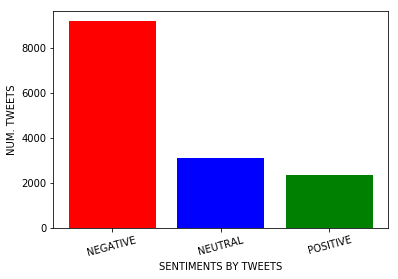

In [20]:
Index=[1, 2, 3]
print(Tweets_df.airline_sentiment.value_counts())
plt.bar(Index, Tweets_df.airline_sentiment.value_counts(),color=['r','b','g'])
plt.xticks(Index, ['NEGATIVE', 'NEUTRAL', 'POSITIVE'], rotation = 15)
plt.ylabel('NUM. TWEETS')
plt.xlabel('SENTIMENTS BY TWEETS')

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


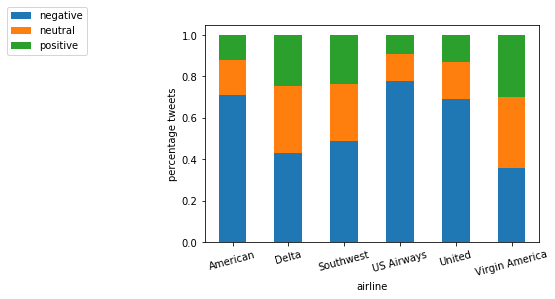

In [21]:
Tweets_df_gr=Tweets_df.groupby(["airline","airline_sentiment"]).size().unstack()
Tweets_df_gr=Tweets_df_gr.div(Tweets_df_gr.sum(axis=1),axis='index')
print(Tweets_df_gr)
ax=Tweets_df_gr.plot.bar(stacked=True)
plt.ylabel('percentage tweets')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=3, borderaxespad=-3)

Text(0,0.5,'Number of Tweets')

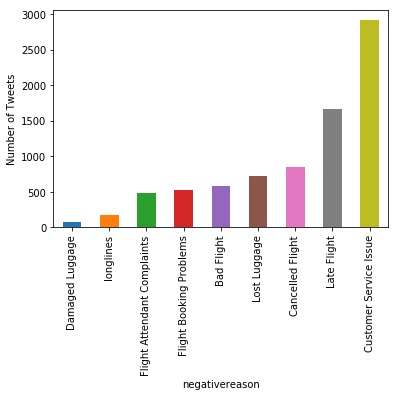

In [22]:
##Normalized sentiment by airline plotted to see how the relative number of the individual sentiments
##varies across different airlines.
negative_tweets=Tweets_df[(Tweets_df.airline_sentiment=="negative") & (Tweets_df.negativereason !="Can't Tell")]
Tweets_df_neg=negative_tweets.groupby(["negativereason"]).size().sort_values()
Tweets_df_neg.plot.bar()
plt.ylabel('Number of Tweets')

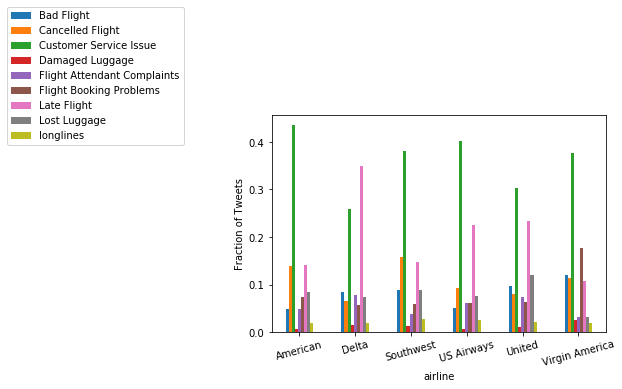

In [23]:
df=negative_tweets.groupby(["airline","negativereason"]).size().unstack()
df=df.div(df.sum(axis=1),axis='index')#rowsum
ax=df.plot.bar(stacked=False)
plt.ylabel('Fraction of Tweets')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(-0.7, 1), loc=3, borderaxespad=-3)

# Negative WordCloud

In [24]:
df_negative=Tweets_df[Tweets_df['airline_sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [25]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='red',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

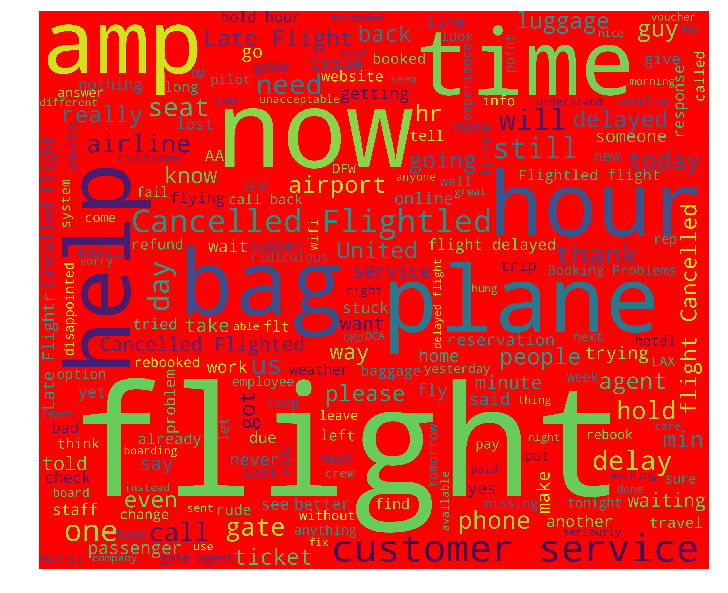

In [26]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Positive WordCloud

In [27]:
df_positive=Tweets_df[Tweets_df['airline_sentiment']=='positive']
words = ' '.join(df_positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [28]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='green',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

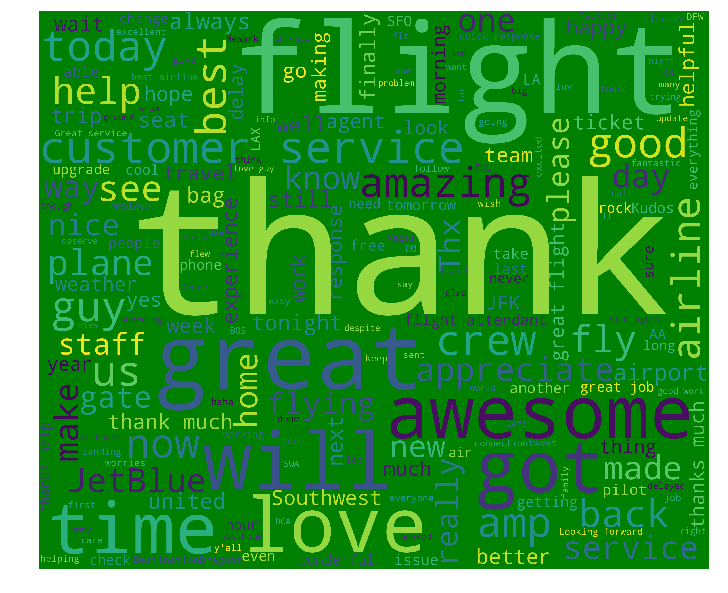

In [29]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Neutral WordCloud

In [30]:
df_neutral=Tweets_df[Tweets_df['airline_sentiment']=='neutral']
words = ' '.join(df_neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='gray',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

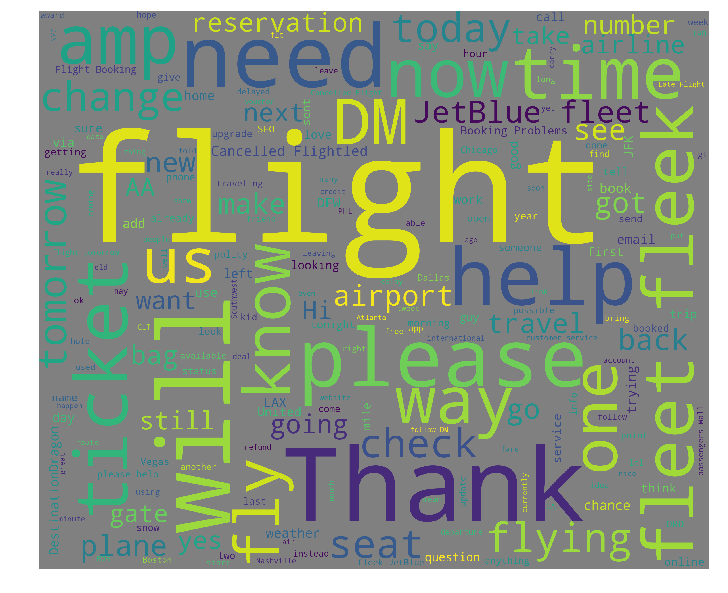

In [32]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Summarize the effect of all Sentiments

In [33]:
data= pd.read_csv('Tweets.csv')
tweets = data['text']

In [34]:
tweets_preprocessed = []
for tweet in tweets:
    p.set_options(p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.URL)
    tweets_preprocessed.append(p.clean(tweet))

In [35]:
tweets_cleaned_0= []  

for tweet in tweets_preprocessed:   
    tweet = emoji.demojize(tweet).replace('_','')
    tweet = re.sub(r'\b\w{1,1}\b', '', tweet)
    tweets_cleaned_0.append(tweet) 

In [36]:
'''Preprocessing'''
tweets_cleaned_1=[]
for s in range(len(tweets_cleaned_0)):
    tweet = re.sub(r"that's","that is", str(tweets_cleaned_0[s]))
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"you've","you have",tweet)
    tweet = re.sub(r"I've","I have",tweet)
    tweet = re.sub(r"they've","they have",tweet)
    tweet = re.sub(r"we've","we have",tweet)
    tweet = re.sub(r"there're","there are",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"what've", "what have", tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"there're","there are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"we'll","we will",tweet)
    tweet = re.sub(r"I'll","I will",tweet)
    tweet = re.sub(r"you'll","you will",tweet)
    tweet = re.sub(r"she'll","she will",tweet)
    tweet = re.sub(r"he'll","he will",tweet)
    tweet = re.sub(r"it'll","it will",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"could've","could have",tweet)
    tweet = re.sub(r"couldn't've","could not have",tweet)
    tweet = re.sub(r"didn't","did not",tweet)
    tweet = re.sub(r"don't","do not",tweet)
    tweet = re.sub(r"doesn't","does not",tweet)
    tweet = re.sub(r"everyone's","everyone is",tweet)
    tweet = re.sub(r"giv’n","given",tweet)
    tweet = re.sub(r"hasn't","has not",tweet)
    tweet = re.sub(r"haven't","have not",tweet)
    tweet = re.sub(r"hadn't","had not",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"mustn't", "must not", tweet)
    tweet = re.sub(r":D", "smiley", tweet)
    tweet = re.sub(r":-D", "smiley", tweet)
    tweet = re.sub(r":\)", "simple_smile", tweet)
    tweet = re.sub(r";D", "wink", tweet)
    tweet = re.sub(r";D", "wink", tweet)
    tweet = re.sub(r":-\)", "simple_smile", tweet)
    tweet = re.sub(r";\)", "wink", tweet)
    tweet = re.sub(r";-\)", "wink", tweet)
    tweet = re.sub(r":P", "stuck_out_tongue", tweet)
    tweet = re.sub(r":-P", "stuck_out_tongue", tweet)
    tweet = re.sub(r";P", "stuck_out_tongue_closed_eyes", tweet)
    tweet = re.sub(r";-P", "stuck_out_tongue_closed_eyes", tweet)
    tweet = re.sub(r":\(", "worried", tweet)
    tweet = re.sub(r":-\(", "worried", tweet)
    tweet = re.sub(r":'\('", "cry", tweet)
    tweet = re.sub(r'\W', ' ', tweet)  ##quita signos de puntuación
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'^br$', ' ', tweet)
    tweet = re.sub(r'^[a-zA-Z]\s', ' ', tweet)
    tweet = re.sub(r'\s+br\s+',' ',tweet)
    tweet = re.sub(r'\s+[a-z]\s+', ' ',tweet)
    tweet = re.sub(r'^b\s+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.split()
    tweet = ' '.join(tweet)
    tweets_cleaned_1.append(tweet) 

In [37]:
from pywsd.utils import lemmatize_sentence

In [38]:
tweets_cleaned_2=[]

for sentence in tweets_cleaned_1:
    lem = lemmatize_sentence(sentence)
    lem = ' '.join(lem)
    tweets_cleaned_2.append(lem)

In [39]:
tweets_cleaned_2

['what say',
 'plus you have add commercial to the experience tacky',
 'didn today must mean need to take another trip',
 'it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse',
 'and it really big bad thing about it',
 'seriously would pay flight for seat that didn have this playing it really the only bad thing about fly va',
 'yes nearly every time fly vx this ear worm win go away simple_smile',
 'really missed prime opportunity for men without hat parody there',
 'well didn but now do',
 'it be amaze and arrive an hour early you re too good to me',
 'do you know that suicide be the second leading cause of death among teen',
 'lt pretty graphic so much good than minimal iconography',
 'this be such great deal already think about my nd trip to amp haven even go on my st trip yet',
 'fly your sky again take all the away from travel',
 'thanks',
 'sfo pdx schedule be still mia',
 'so excited for my first cross country flight lax to mco ve heard nothing but great thing about virgin america',
 'flew from nyc to sfo last week and couldn fully sit in my seat due to two large gentleman on either side of me help',
 'redheart fly smilingface thumbsup',
 'you know what would be amazingly awesome bos fll please want to fly with only you',
 'why be your first fare in may over three time more than other carrier when all seat be available to select',
 'love this graphic',
 'love the hipster innovation you be feel good brand',
 'will you be make bos gt la non stop permanently anytime soon',
 'you guy mess up my seating reserve seat with my friend and you guy give my seat away poutingface want free internet',
 'status match program apply and it be three week call and email with no response',
 'what happen ur vegan food option at least say on ur site so know won be able eat anything for next hr',
 'do you miss me don worry we will be together very soon',
 'amaze to me that we can get any cold air from the vent',
 'lax to ewr middle seat on red eye such noob maneuver',
 'hi just bked cool birthday trip with you but can add my elevate no cause enter my middle name during flight book problem cryingface',
 'be the hour of operation for the club at sfo that be post online current',
 'help leave expensive headphone on flight iad to lax today seat no one answer amp number at lax',
 'await my return phone call just would prefer to use your online self service option worry',
 'this be great news america could start flight to hawaii by end of year via',
 'nice rt vibe with the moodlight from takeoff to touchdown',
 'moodlighting be the only way to fly best experience ever cool and calm purpleheart airplane',
 'do and do best airline around hand down',
 'when can book my flight to hawaii',
 'your chat support be not work on your site',
 'view of downtown los angel the hollywood sign and beyond that rain in the mountain',
 'hey first time flyer next week excite but have hard time get my flight add to my elevate account help',
 'plz help me win my bid upgrade for my flight lax gt sea wineglass thumbsup seat airplane',
 'have an unused ticket but move to new city where you don fly how can fly with you before it expire',
 'be flight leave dallas for seattle on time feb',
 'for good reason you rock',
 'dream',
 'wow this just blow my mind',
 'after last night think agree',
 'all be entertain',
 'be flight on it way be suppose to take off minute ago website still show on time not in flight thanks',
 'julie andrews all the way though be very impressive no to',
 'wish you fly out of atlanta soon',
 'julie andrews hand down',
 'will flight be leave dallas for la on february th',
 'hi so excited about your lga gtwinkal deal but ve be try book since last week amp the page never load thx',
 'you know it need it on my spotify stat',
 'lady gaga she be amazing smilingfacewithsmilingeyes',
 'carrie',
 'new marketing song let u know what you think',
 'julie andrew first but lady gaga wow me last night carrie meh',
 'cal

In [40]:
y=Tweets_df['airline_sentiment']
corpus_train, corpus_test, y_train, y_test = train_test_split(tweets_cleaned_2, y, train_size=0.8, random_state=0)


vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

/home/dsc/anaconda3/envs/Kschool/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
model = sklearn.linear_model.LogisticRegression(penalty="l1", C=0.1)
model.fit(X_train, y_train)

/home/dsc/anaconda3/envs/Kschool/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/envs/Kschool/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

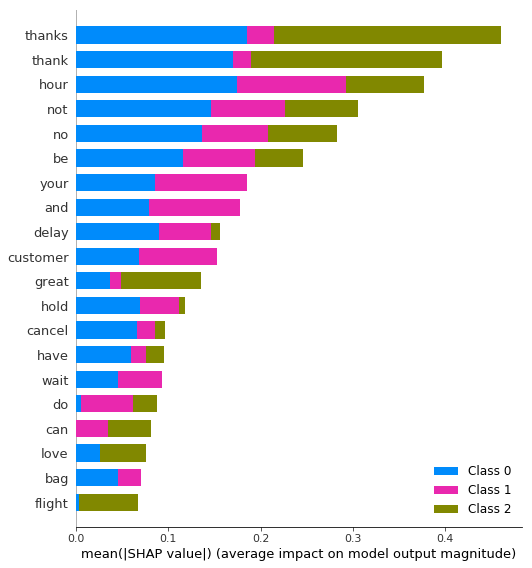

In [43]:
# Class 0 = Negative
# Class 1 = Neutral
# Class 2 = Positive
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

# Features. Rename Dataset's features.

In [44]:
##Variables that are below 10,000 nulls and that are representative for development are selected.
##The variables are renamed so that it is easier to work with them.
def feature_Tweets_df(Tweets_df):
    Tweets_df = Tweets_df.loc[: , ['airline_sentiment', 
                         'airline_sentiment_confidence',
                         'negativereason',
                         'negativereason_confidence',              
                         'name',
                         'text',
                         'retweet_count',
                         'tweet_location',
                         'tweet_coord',
                         'tweet_created',
                         'user_timezone',
                         'airline']].rename(columns = {'airline_sentiment':'Sentiment',
                                                             'airline_sentiment_confidence':'Sentiment_Conf',
                                                             'negativereason':'Negative_Reason',
                                                             'negativereason_confidence':'Negative_Reason_Conf',
                                                             'airline':'Airline',
                                                             'name':'User',
                                                             'text':'Text',
                                                             'retweet_count':'Retweet_Count',
                                                             'tweet_location':'Tweet_Loc', 
                                                             'tweet_coord':'Tweet_Coord',
                                                             'user_timezone':'User_Timezone',
                                                             'tweet_created':'Tweet_Created'}).set_index('Tweet_Created')
    return Tweets_df
feature_Tweets_df(Tweets_df).head(2)

,Sentiment,Sentiment_Conf,Negative_Reason,Negative_Reason_Conf,User,Text,Retweet_Count,Tweet_Loc,Tweet_Coord,User_Timezone,Airline
Tweet_Created,,,,,,,,,,,
2015-02-24 11:35:52 -0800,neutral,1.0000,NaN,NaN,cairdin,@VirginAmerica What @dhepburn said.,0,NaN,NaN,Eastern Time (US & Canada),Virgin America
2015-02-24 11:15:59 -0800,positive,0.3486,NaN,0.0,jnardino,@VirginAmerica plus you've added commercials t...,0,NaN,NaN,Pacific Time (US & Canada),Virgin America
